In [1]:
import pandas as pd
import numpy as np
from helper_functions import *
import matplotlib.pyplot as plt
plt.style.use('seaborn')
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
import seaborn as sns
from datetime import datetime, date, time, timedelta
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
today = date.today().strftime('%d-%b-%Y')

In [3]:
data_path = '../data/cleaned_data.csv'
df = pd.read_csv(data_path,index_col=[0])

In [4]:
df

,Name,Country,Gender,Division,Swim,Bike,Run,Overall,Division Rank,Gender Rank,Overall Rank,T1,T2
0,"Frodeno, Jan",DEU,Male,MPRO,47.516667,256.033333,162.716667,471.216667,1,1,1,1.966667,2.983333
1,"O'donnell, Tim",USA,Male,MPRO,47.633333,258.183333,169.750000,479.683333,2,2,2,2.016667,2.100000
2,"Kienle, Sebastian",DEU,Male,MPRO,52.283333,255.066667,169.933333,482.066667,3,3,3,2.200000,2.583333
3,"Hoffman, Ben",USA,Male,MPRO,51.016667,264.016667,163.133333,482.866667,4,4,4,2.416667,2.283333
4,"Wurf, Cameron",AUS,Male,MPRO,52.416667,254.733333,175.050000,486.683333,5,5,5,2.116667,2.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,"Beavers, Cathy",USA,Female,F65-69,105.500000,505.016667,378.866667,1010.050000,26,609,2262,10.416667,10.250000
2254,"Whitehouse, Paul",USA,Male,M70-74,126.016667,471.333333,389.566667,1010.066667,28,1654,2263,11.816667,11.333333
2255,"Svoboda-vasquez, Hanna",DEU,Female,F50-54,89.550000,496.450000,407.700000,1011.050000,66,610,2264,9.783333,7.566667
2256,"Piasentini, Edgardo",ARG,Male,M65-69,102.450000,462.150000,433.816667,1013.350000,50,1655,2265,6.283333,8.650000


# EDA

In [5]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

In [6]:
df['Division'].unique()

array(['MPRO', 'M35-39', 'FPRO', 'M30-34', 'M25-29', 'M45-49', 'M40-44',
       'M18-24', 'M50-54', 'F30-34', 'M55-59', 'F25-29', 'F45-49',
       'F50-54', 'F35-39', 'F40-44', 'M60-64', 'F18-24', 'F55-59',
       'M65-69', 'F60-64', 'M70-74', 'F65-69', 'M75-79', 'F70-74',
       'M80-84'], dtype=object)

#### Scatter plots of pro event times by gender

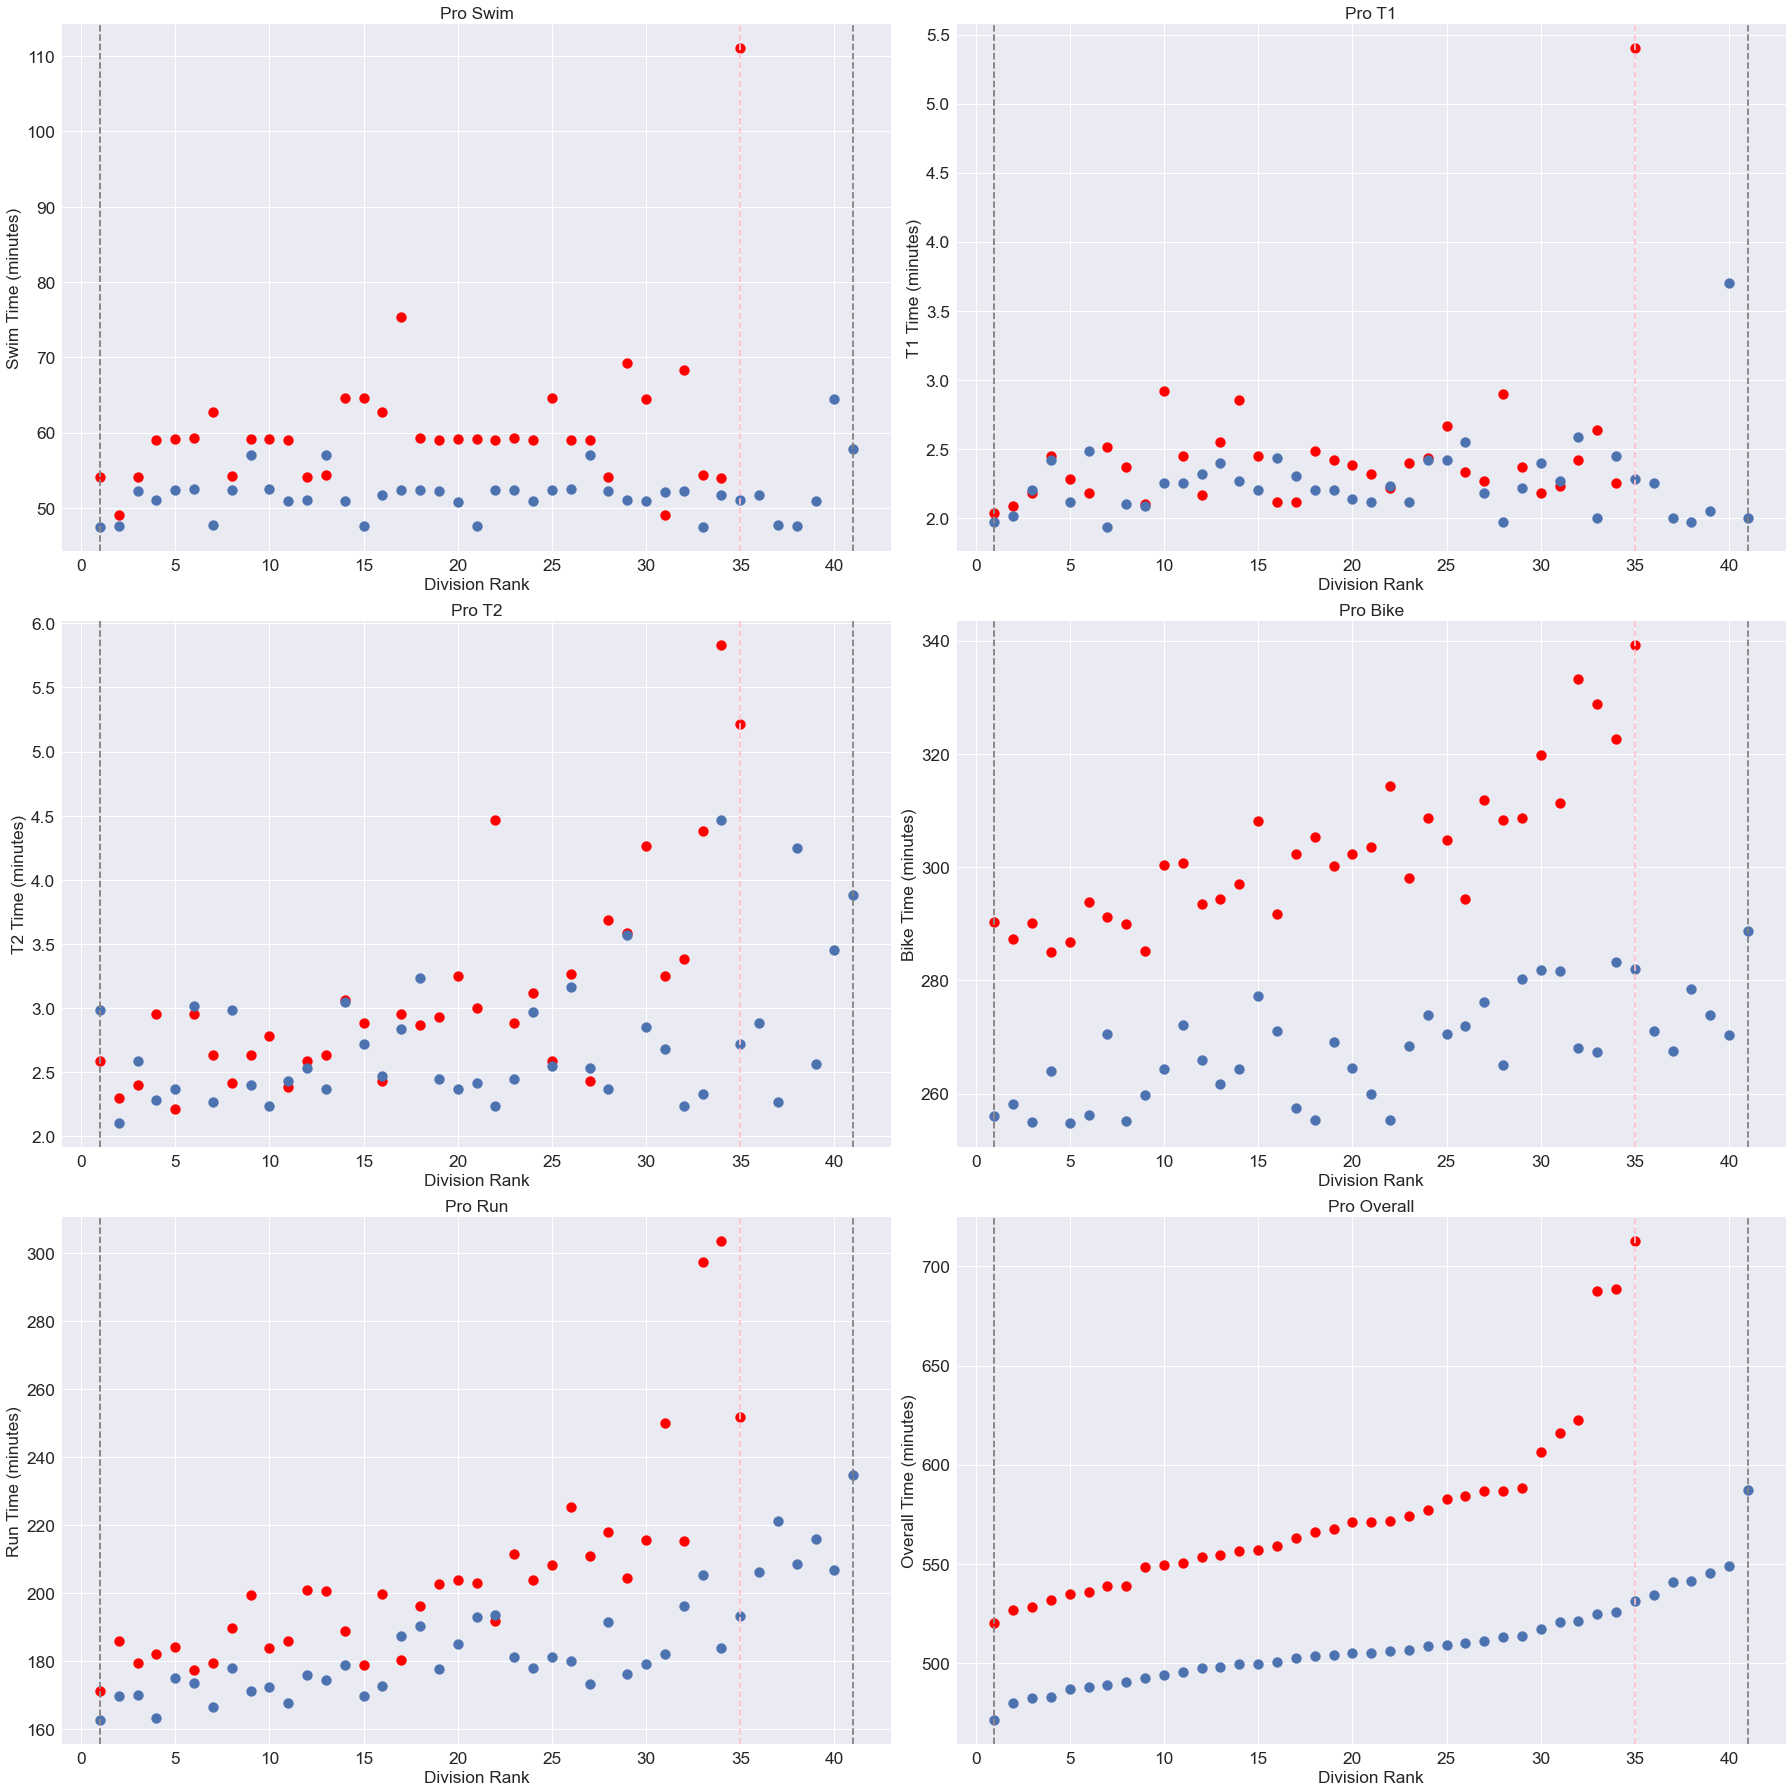

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(25,25))
plot_gender_ranks(axs, df)
plt.tight_layout()
#plt.savefig(f'../images/pro-{today}');

#### Scatter plots of amateur event times by gender

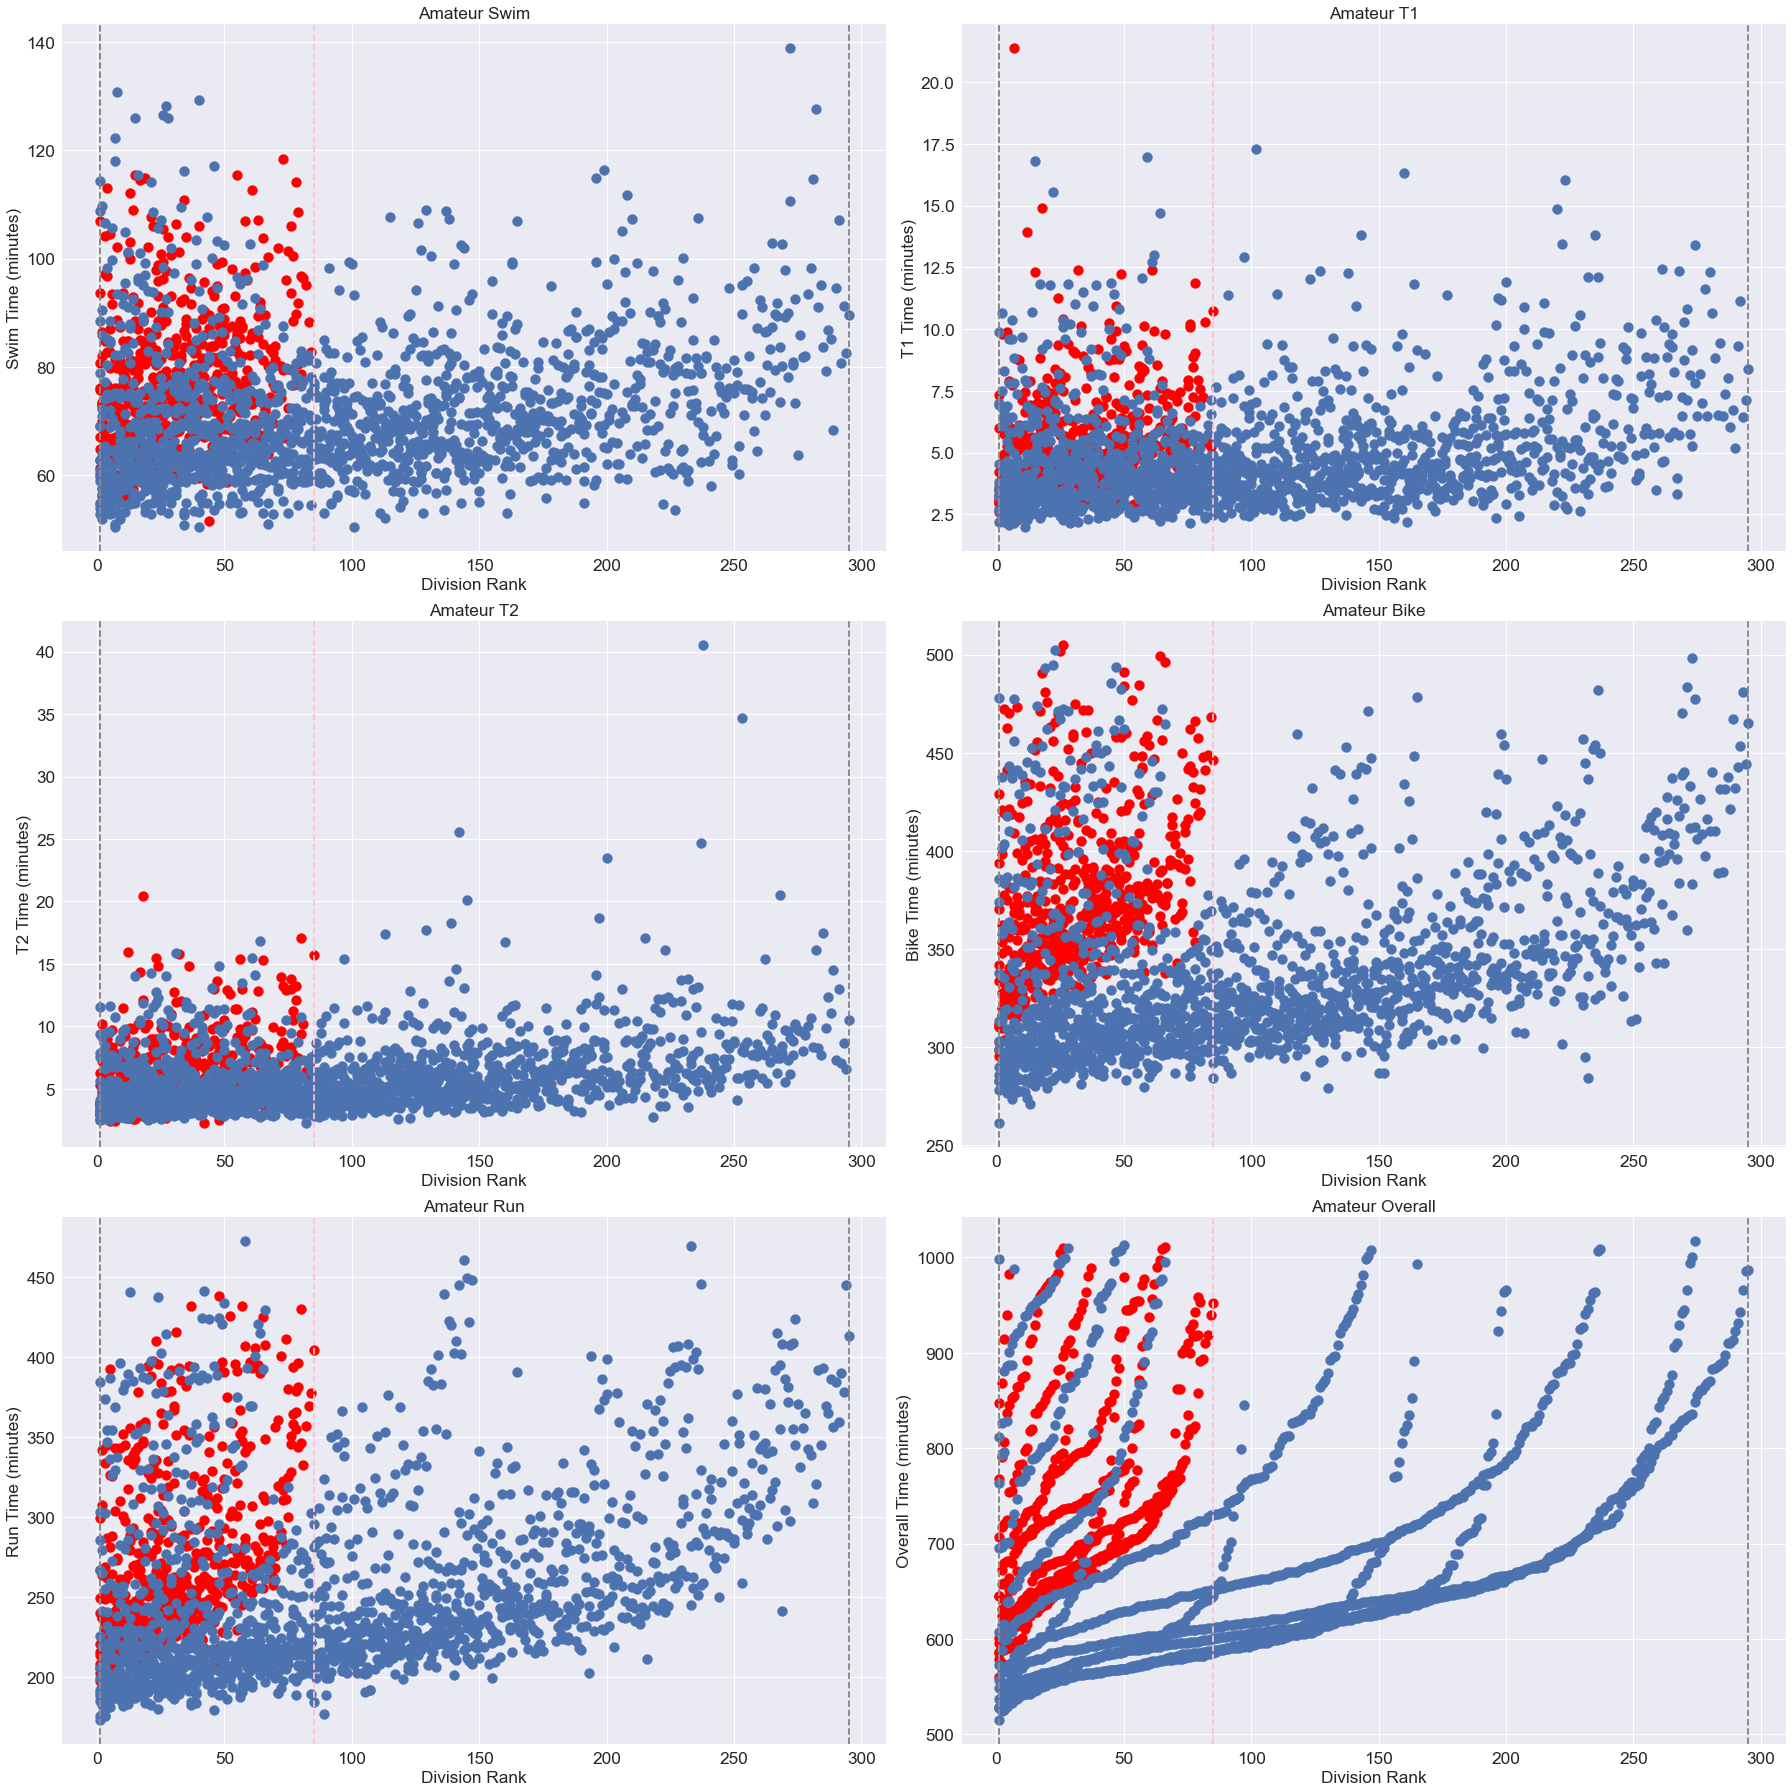

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(25,25))
plot_gender_ranks(axs, df, division='Amateur')
plt.tight_layout()
#plt.savefig(f'../images/amateur-{today}');

There are several outliers when looking at the scatter plots of professional times.  ... (explain some thoughts here)

# Do men race faster on average than women?

Based on these scatter plots, it certainly seems so. I will conduct a two-sample, unpaired T-Test since both gender's event times are independent of each other. This test states a null hypothesis and alternative hypothesis as follows:

Null hypothesis: men and women mean race times are equal.

Alternative hypothesis: men and women mean race times are not equal, or one of them races faster on average than the other.

1. Randomly sample with replacement from division's sample.
2. Average times.
3. Plot histogram of means.
4. Define normal distribution.
5. Compare mean differences in normally distributed averages.

In [9]:
sports = ['Swim', 'T1', 'Bike', 'T2', 'Run', 'Overall']

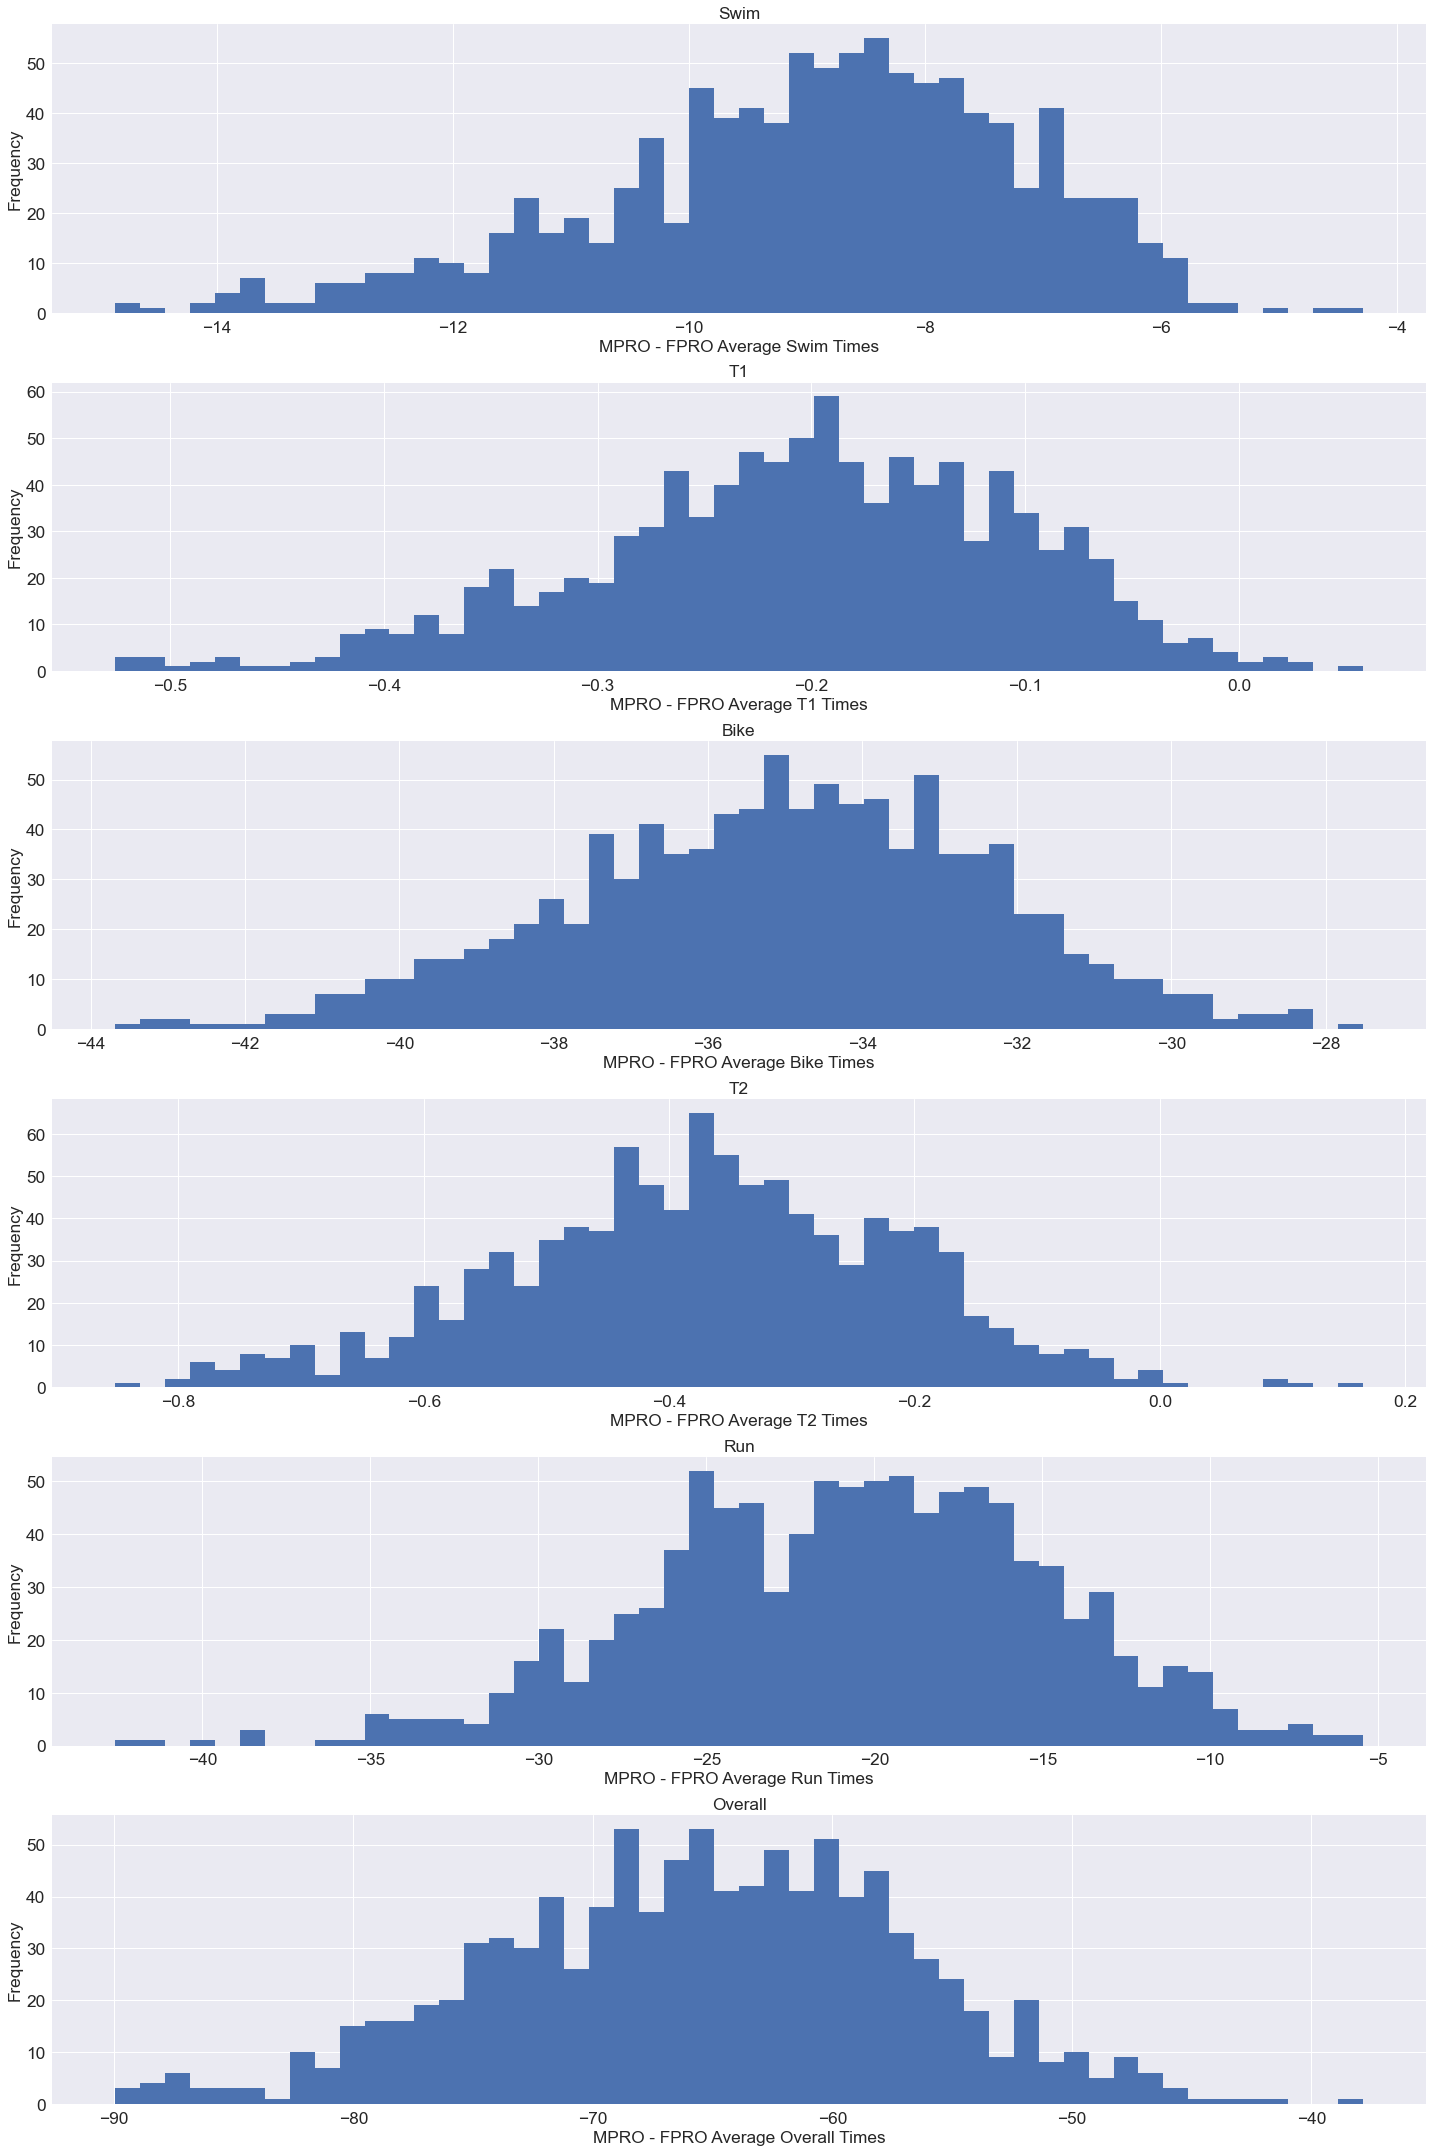

In [10]:
fig, axs = plt.subplots(6, figsize=(20,30))
for sport, ax in zip(sports, axs):
    plot_hist_stats(ax, df, sport, 'MPRO', 'FPRO', 1000, np.mean)
plt.tight_layout()
#plt.savefig(f'../images/mpro-fpro-{today}');

In [11]:
t_statistic, pvalue = ttest_ind(df[df['Division']=='MPRO']['Overall'], df[df['Division']=='FPRO']['Overall'], equal_var=False)
print(f'Pro t-test statistic: {round(t_statistic,2)}')
print(f'Pro p-value: {round(pvalue, 4)}')

Pro t-test statistic: -7.76
Pro p-value: 0.0


In [12]:
t_statistic, pvalue = ttest_ind(df[df['Division']!='MPRO']['Overall'], df[df['Division']!='FPRO']['Overall'], equal_var=False)
print(f'Amateur t-test statistic: {round(t_statistic,2)}')
print(f'Amateur p-value: {round(pvalue,2)}')

Amateur t-test statistic: 0.45
Amateur p-value: 0.65


# What correlation do event times have with ranking?

In [13]:
heatmap_cols = ['Swim', 'T1', 'Bike', 'T2', 'Run', 'Overall', 'Gender', 'Division Rank']
heat_df = df[heatmap_cols]

Text(0.5, 1.0, 'Amateurs')

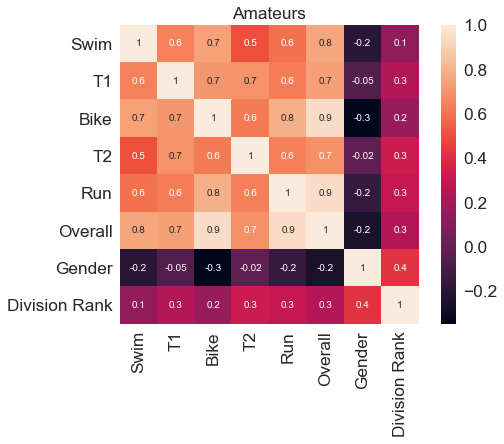

In [14]:
sns.heatmap(heat_df.corr(), annot = True, fmt='.1g', square=True)
plt.title('Amateurs')
#plt.savefig('../images/amateurheatmap.png');

Text(0.5, 1.0, 'Professionals')

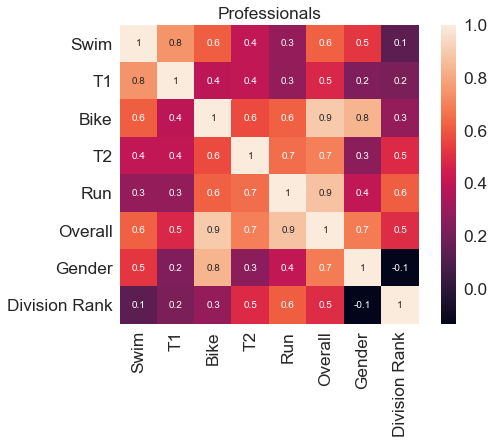

In [15]:
pro_mask = (df['Division'] == 'MPRO') | (df['Division'] == 'FPRO')
heat_pros = df[pro_mask].copy()
heat_pros['Gender'] = (df['Division'] == "FPRO")
heat_pros['Gender'].astype(int)
plot = heat_pros[heatmap_cols]
sns.heatmap(plot.corr(), annot = True, fmt='.1g', square=True)
plt.title('Professionals')
#plt.savefig('../images/proheatmap.png');

# How many amateurs are racing like pros?

I'm looking to bootstrap the lower 90th percentile of pro event times, and compare those to the bootstrapped 10th percentile of amateur event times. Bootstrapping will allow me to generalize to a larger population of professional/amateur ironman triathletes, not just the athletes represented in Kona.

Female PRO Overall Times Bootstrap CI 90th Percentile (minutes): [586.9, 688.37]
Male PRO Overall Times Bootstrap CI90th Percentile (minutes): [524.48, 545.65]


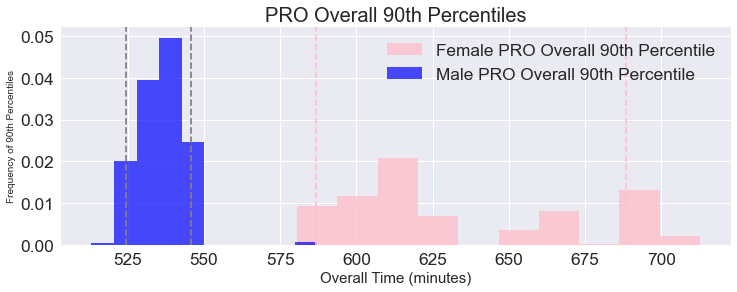

In [16]:
fig, ax, overall_CIf_pro, overall_CIm_pro = plot_percentile('Overall', df, 'PRO', percentile=90);

Female PRO Overall Times Bootstrap CI 90th Percentile (minutes): [586.72, 688.37]
Male PRO Overall Times Bootstrap CI90th Percentile (minutes): [524.48, 545.65]


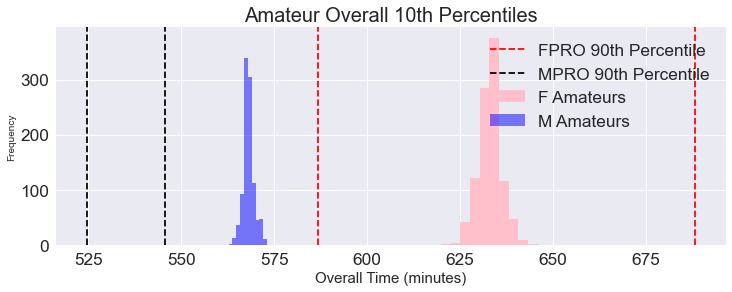

In [17]:
plot_fastamateurs('Overall', df);

In [18]:
'''
for sport in sports:
    plot_fastamateurs(sport, df)
    plt.savefig(f'../images/{sport}_comparison.png');
'''

"\nfor sport in sports:\n    plot_fastamateurs(sport, df)\n    plt.savefig(f'../images/{sport}_comparison.png');\n"

### Just who are these fast amateurs?

In [19]:
fem_pro_df = df[df['Division'] == 'FPRO']
male_pro_df = df[df['Division'] == 'MPRO']
amateur_df = df[(df['Division'] != 'FPRO') & (df['Division'] != 'MPRO')]
fem_amateur = amateur_df[amateur_df['Division'].str.contains('F')]
male_amateur = amateur_df[amateur_df['Division'].str.contains('M')]

fem_pro_overall = bootstrap_percentile(fem_pro_df, 'Overall', samples=1000, 
                                           percent=90, statistic=np.percentile)
male_pro_overall = bootstrap_percentile(male_pro_df, 'Overall', samples=1000, 
                                            percent=90, statistic=np.percentile)

right_f90p = np.percentile(fem_pro_overall, 97.5)
right_m90p = np.percentile(male_pro_overall, 97.5)

best_f_amateurs = fem_amateur[fem_amateur['Overall'] <= right_f90p]
best_m_amateurs = male_amateur[male_amateur['Overall'] <= right_m90p]

sponsor_these_women = best_f_amateurs.sort_values('Overall')['Name'].tolist()
sponsor_these_men = best_m_amateurs.sort_values('Overall')['Name'].tolist()

print(f'Top 10 Male Amateurs:')
print(' ')
for i in range(len(sponsor_these_men)):
    print(f'{i+1} {sponsor_these_men[i]}')
    if i == 9: break
print(' ')
print(f'Top 10 Female Amateurs:')
print(' ')
for i in range(int(len(sponsor_these_women)/5)):
    print(f'{i+1} {sponsor_these_women[i]}')
    if i == 9: break

Top 10 Male Amateurs:
 
1 Marques, Sergio
2 Dels, Christopher
3 Geldenhuys, Donovan
4 Caceres lopez, Ivan
5 Tomasz, Aaron
6 Vinokurov, Alexandre
7 Picard, Raynard
8 Eddy, Neil
9 Giuliano, Ryan
10 De korver, Derk
 
Top 10 Female Amateurs:
 
1 Purbrook, Ruth
2 Schut, Kirsten
3 Van heerden, Natia
4 Dommer, Janette
5 Goertz, Beate
6 Luoma, Aino
7 Giuliano, Jacqui
8 Nishimura, Chino
9 De baey-ruszin, Kirsten
10 Kuhnert, Stefanie


# Next compare event times to athlete's overall rank

To better see the event time's weight in their correlation with athlete's Overall Rank, I will standardize the timed event columns and plot them against Overall Rank!

Notes:

Athletes in 10 percentile Swim, also perform in 10 percentile Bike, or Run or Overall.
H0: 10% Swim => no better in Overall
    10% Swim - A
    90% Swim - B
Ha: 10% Swim == 10% other events

Standardized MA: standardization - subtract mean from ea. swim row, then divide by std dev
    Do this for all 'time' columns to be able to compare them
    This would change columns to non-dimensional

Bootstrap *mean* times 
Man Whitney U test: non-parametric version of the t-test

Adv.
Are countries surrounded by more water, producing athletes in 10% Swim?


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
print(df.shape)
df.head()

(2256, 13)


,Name,Country,Gender,Division,Swim,Bike,Run,Overall,Division Rank,Gender Rank,Overall Rank,T1,T2
0,"Frodeno, Jan",DEU,1,MPRO,47.516667,256.033333,162.716667,471.216667,1,1,1,1.966667,2.983333
1,"O'donnell, Tim",USA,1,MPRO,47.633333,258.183333,169.750000,479.683333,2,2,2,2.016667,2.100000
2,"Kienle, Sebastian",DEU,1,MPRO,52.283333,255.066667,169.933333,482.066667,3,3,3,2.200000,2.583333
3,"Hoffman, Ben",USA,1,MPRO,51.016667,264.016667,163.133333,482.866667,4,4,4,2.416667,2.283333
4,"Wurf, Cameron",AUS,1,MPRO,52.416667,254.733333,175.050000,486.683333,5,5,5,2.116667,2.366667


In [22]:
sports_df = df[sports].copy()

In [23]:
string = '_Scaled'
columns = [elem + string for elem in sports]

In [24]:
scaler = StandardScaler()
scaler.fit(sports_df)
sports_df_scaled = pd.DataFrame(scaler.transform(sports_df), columns=columns)
sports_df_scaled

,Swim_Scaled,T1_Scaled,Bike_Scaled,T2_Scaled,Run_Scaled,Overall_Scaled
0,-1.883184,-1.332243,-1.893678,-1.008652,-1.626397,-1.899646
1,-1.874301,-1.309350,-1.848245,-1.315450,-1.504890,-1.824595
2,-1.520258,-1.225408,-1.914105,-1.147579,-1.501723,-1.803469
3,-1.616700,-1.126203,-1.724977,-1.251775,-1.619199,-1.796377
4,-1.510107,-1.263563,-1.921149,-1.222832,-1.413328,-1.762546
...,...,...,...,...,...,...
2251,2.531568,2.536726,3.367750,1.515199,2.107774,2.876717
2252,4.093672,3.177738,2.655966,1.891462,2.292626,2.876865
2253,1.317162,2.246744,3.186722,0.583227,2.605894,2.885581
2254,2.299346,0.644213,2.461907,0.959489,3.057081,2.905969


In [25]:
df_scaled = pd.concat([df, sports_df_scaled], axis=1)
df_scaled.head()

,Name,Country,Gender,Division,Swim,Bike,Run,Overall,Division Rank,Gender Rank,Overall Rank,T1,T2,Swim_Scaled,T1_Scaled,Bike_Scaled,T2_Scaled,Run_Scaled,Overall_Scaled
0,"Frodeno, Jan",DEU,1.0,MPRO,47.516667,256.033333,162.716667,471.216667,1.0,1.0,1.0,1.966667,2.983333,-1.883184,-1.332243,-1.893678,-1.008652,-1.626397,-1.899646
1,"O'donnell, Tim",USA,1.0,MPRO,47.633333,258.183333,169.750000,479.683333,2.0,2.0,2.0,2.016667,2.100000,-1.874301,-1.309350,-1.848245,-1.315450,-1.504890,-1.824595
2,"Kienle, Sebastian",DEU,1.0,MPRO,52.283333,255.066667,169.933333,482.066667,3.0,3.0,3.0,2.200000,2.583333,-1.520258,-1.225408,-1.914105,-1.147579,-1.501723,-1.803469
3,"Hoffman, Ben",USA,1.0,MPRO,51.016667,264.016667,163.133333,482.866667,4.0,4.0,4.0,2.416667,2.283333,-1.616700,-1.126203,-1.724977,-1.251775,-1.619199,-1.796377
4,"Wurf, Cameron",AUS,1.0,MPRO,52.416667,254.733333,175.050000,486.683333,5.0,5.0,5.0,2.116667,2.366667,-1.510107,-1.263563,-1.921149,-1.222832,-1.413328,-1.762546


In [26]:
df_scaled.dropna(inplace=True)

In [27]:
df_scaled.isnull().sum()

Name              0
Country           0
Gender            0
Division          0
Swim              0
Bike              0
Run               0
Overall           0
Division Rank     0
Gender Rank       0
Overall Rank      0
T1                0
T2                0
Swim_Scaled       0
T1_Scaled         0
Bike_Scaled       0
T2_Scaled         0
Run_Scaled        0
Overall_Scaled    0
dtype: int64

# Do athletes who perform consistent in event times perform better than inconsistent athletes?

In [28]:
df_scaled['Consistency'] = df_scaled.apply(consistency, axis=1)

In [29]:
df_scaled.head()

,Name,Country,Gender,Division,Swim,Bike,Run,Overall,Division Rank,Gender Rank,Overall Rank,T1,T2,Swim_Scaled,T1_Scaled,Bike_Scaled,T2_Scaled,Run_Scaled,Overall_Scaled,Consistency
0,"Frodeno, Jan",DEU,1.0,MPRO,47.516667,256.033333,162.716667,471.216667,1.0,1.0,1.0,1.966667,2.983333,-1.883184,-1.332243,-1.893678,-1.008652,-1.626397,-1.899646,0.267281
1,"O'donnell, Tim",USA,1.0,MPRO,47.633333,258.183333,169.750000,479.683333,2.0,2.0,2.0,2.016667,2.100000,-1.874301,-1.309350,-1.848245,-1.315450,-1.504890,-1.824595,0.369411
2,"Kienle, Sebastian",DEU,1.0,MPRO,52.283333,255.066667,169.933333,482.066667,3.0,3.0,3.0,2.200000,2.583333,-1.520258,-1.225408,-1.914105,-1.147579,-1.501723,-1.803469,0.412382
3,"Hoffman, Ben",USA,1.0,MPRO,51.016667,264.016667,163.133333,482.866667,4.0,4.0,4.0,2.416667,2.283333,-1.616700,-1.126203,-1.724977,-1.251775,-1.619199,-1.796377,0.108277
4,"Wurf, Cameron",AUS,1.0,MPRO,52.416667,254.733333,175.050000,486.683333,5.0,5.0,5.0,2.116667,2.366667,-1.510107,-1.263563,-1.921149,-1.222832,-1.413328,-1.762546,0.507820


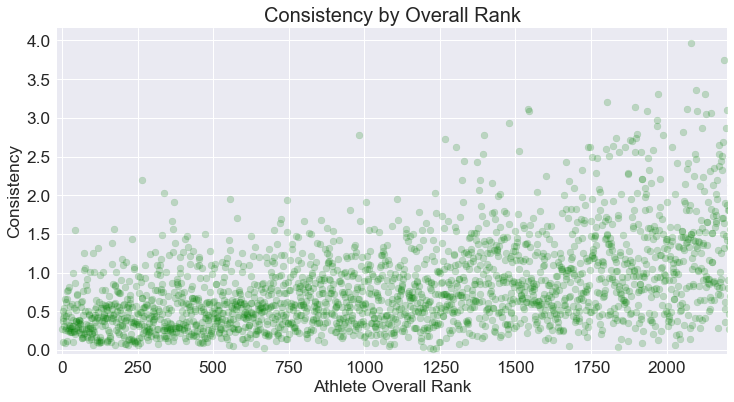

In [30]:
fig, ax = plt.subplots(1, figsize=(12,6))

ax.scatter('Overall Rank', 'Consistency', data=df_scaled, color='green', alpha=0.2)
ax.set_title('Consistency by Overall Rank', fontsize=20)
ax.set_xlabel('Athlete Overall Rank')
ax.set_ylabel('Consistency')
ax.set_xbound(-15, 2200)
ax.set_ybound(-.05)
#plt.savefig('../images/consistency.png')

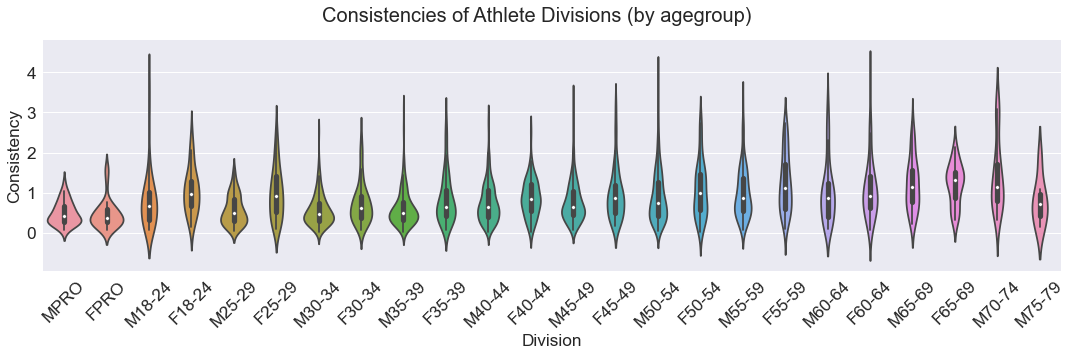

In [31]:
ax = sns.catplot(x='Division', y='Consistency',  kind='violin', split=True, data=df_scaled, 
                 order=['MPRO', 'FPRO', 'M18-24', 'F18-24', 'M25-29', 'F25-29', 'M30-34', 'F30-34', 'M35-39', 'F35-39', 'M40-44', 'F40-44',
                       'M45-49', 'F45-49', 'M50-54', 'F50-54', 'M55-59', 'F55-59', 'M60-64', 'F60-64', 'M65-69', 'F65-69', 'M70-74', 'M75-79'], height=5, aspect=3);
ax.set_xticklabels(rotation=45)
ax.fig.suptitle('Consistencies of Athlete Divisions (by agegroup)', fontsize=20)
plt.tight_layout()
#plt.savefig('../images/divisionconsistency.png');

## Specialization metric:

compare consistency between disciplines : specialization metric

Running specialization = average of normalized (swim + bike) - normalized run.

So if a person has a low (fast) specialized run, but a high (slow) specialized swim and bike, their running specialization score would be high.

"is a running specialist more likely to finish in the top 20 of their division than a bike specialist?"

In [32]:
for discipline in ['Swim', 'Bike', 'Run']:
    df_scaled[f'Specialize_{discipline}'] = df_scaled.apply(specialize, args=(discipline,), axis=1)

In [33]:
df_scaled.head()

,Name,Country,Gender,Division,Swim,Bike,Run,Overall,Division Rank,Gender Rank,...,Swim_Scaled,T1_Scaled,Bike_Scaled,T2_Scaled,Run_Scaled,Overall_Scaled,Consistency,Specialize_Swim,Specialize_Bike,Specialize_Run
0,"Frodeno, Jan",DEU,1.0,MPRO,47.516667,256.033333,162.716667,471.216667,1.0,1.0,...,-1.883184,-1.332243,-1.893678,-1.008652,-1.626397,-1.899646,0.267281,0.123147,0.138887,-0.262034
1,"O'donnell, Tim",USA,1.0,MPRO,47.633333,258.183333,169.750000,479.683333,2.0,2.0,...,-1.874301,-1.309350,-1.848245,-1.315450,-1.504890,-1.824595,0.369411,0.197734,0.158649,-0.356383
2,"Kienle, Sebastian",DEU,1.0,MPRO,52.283333,255.066667,169.933333,482.066667,3.0,3.0,...,-1.520258,-1.225408,-1.914105,-1.147579,-1.501723,-1.803469,0.412382,-0.187656,0.403114,-0.215459
3,"Hoffman, Ben",USA,1.0,MPRO,51.016667,264.016667,163.133333,482.866667,4.0,4.0,...,-1.616700,-1.126203,-1.724977,-1.251775,-1.619199,-1.796377,0.108277,-0.055388,0.107027,-0.051640
4,"Wurf, Cameron",AUS,1.0,MPRO,52.416667,254.733333,175.050000,486.683333,5.0,5.0,...,-1.510107,-1.263563,-1.921149,-1.222832,-1.413328,-1.762546,0.507820,-0.157132,0.459431,-0.302299


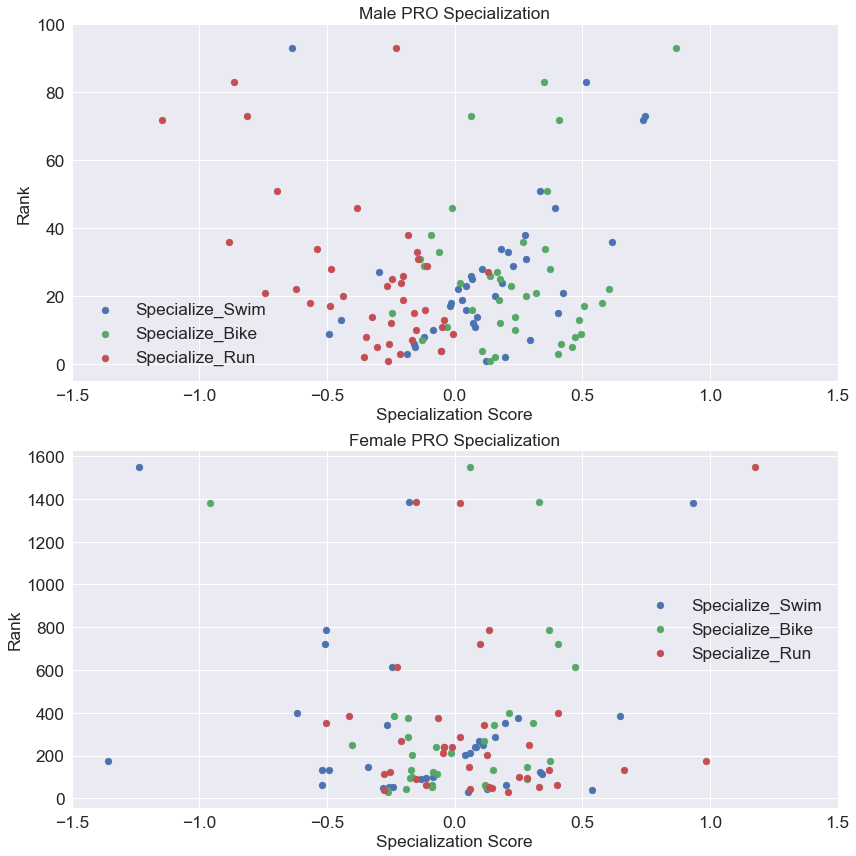

In [34]:
plot_specialization(df_scaled, 'PRO')
plt.tight_layout()
#plt.savefig('../images/pro_specialize.png');

Notes:

-min & max specialization

-consistency bounds

-how it's done at pro level - present alternative hypothesis for training

-plot specialization surface w/dimension == specialization


-df's sort specialties by descending

-cut them in half

-randomly draw from specialty dfs and compare division rank

In [36]:
spec_swim, non_spec_swim = separate_specialized(df_scaled, 'Swim', 0)
spec_bike, non_spec_bike = separate_specialized(df_scaled, 'Bike', 0)
spec_run, non_spec_run = separate_specialized(df_scaled, 'Run', 0)

In [37]:
t_statistic, pvalue = stats.ttest_ind(spec_bike['Overall'], non_spec_bike['Overall'], equal_var=False)
print(f'T-test statistic: {round(t_statistic,2)}')
print(f'P-value: {pvalue}')

T-test statistic: -6.94
P-value: 5.232247692515259e-12


In [38]:
t_statistic, pvalue = stats.ttest_ind(spec_run['Overall'], non_spec_run['Overall'], equal_var=False)
print(f'T-test statistic: {round(t_statistic,2)}')
print(f'P-value: {pvalue}')

T-test statistic: -3.34
P-value: 0.000864428547329144


In [39]:
t_statistic, pvalue = stats.ttest_ind(spec_swim['Overall'], non_spec_swim['Overall'], equal_var=False)
print(f'T-test statistic: {round(t_statistic,2)}')
print(f'P-value: {pvalue}')

T-test statistic: 7.48
P-value: 1.0679126463289316e-13
